In [ ]:
pip install tpot

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
pip install tpot seaborn matplotlib


First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Summary statistics of the Iris dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000         

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.975

Generation 3 - Current best internal CV score: 0.975

Generation 4 - Current best internal CV score: 0.975

Generation 5 - Current best internal CV score: 0.975

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.001)

Accuracy of the best model: 100.00%


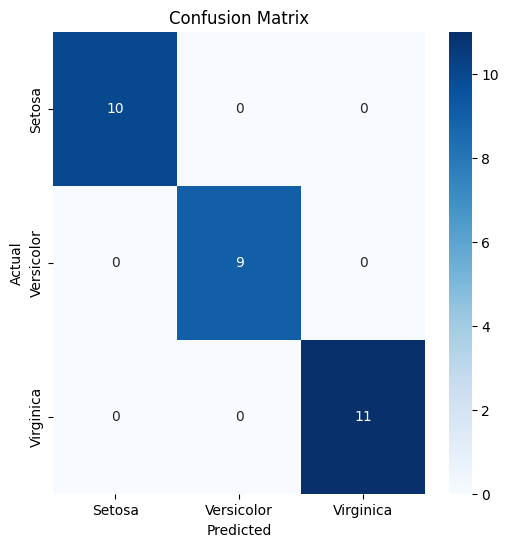

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Visualizing the pairplot of the dataset...


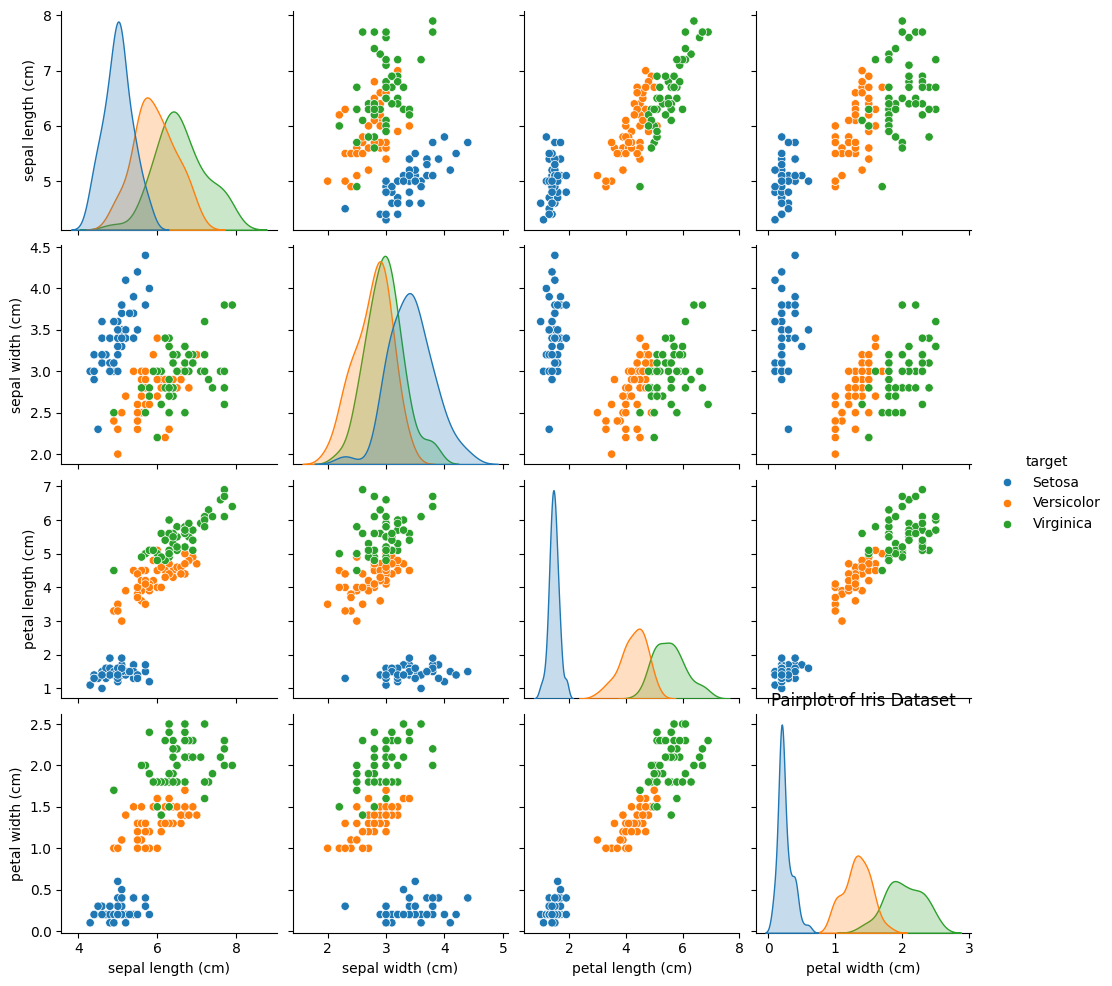

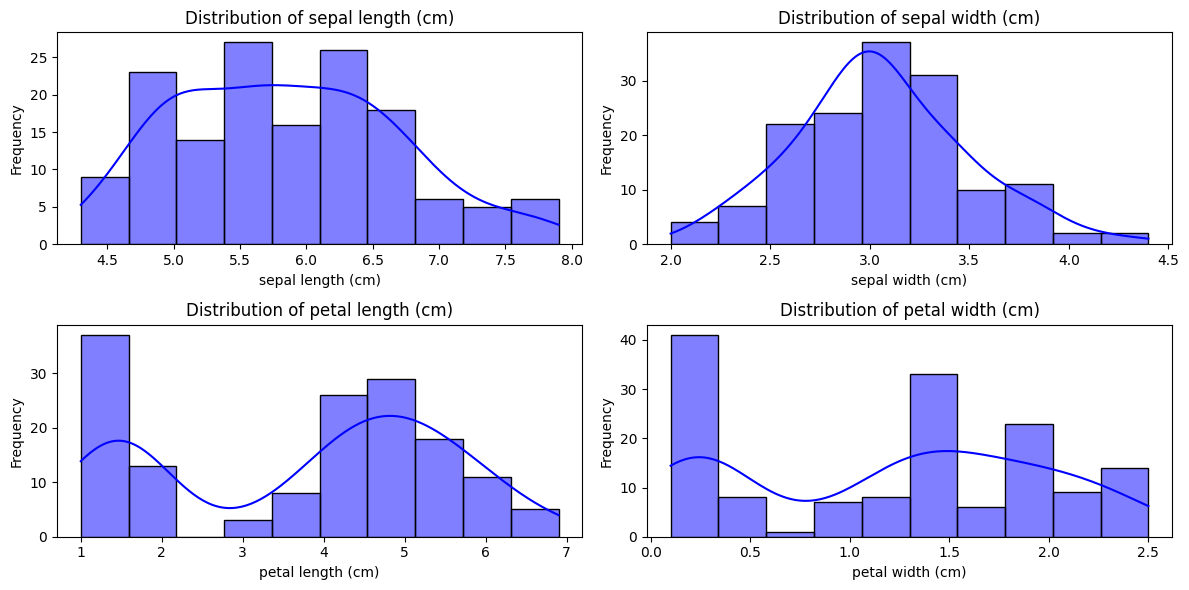

In [ ]:
# Import necessary libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Step 1: Load the Iris dataset from CSV
# Ensure that the path to your CSV file is correct
iris_df = pd.read_csv('iris_dataset.csv')  # Update the file path as needed

# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(iris_df.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the Iris dataset:")
print(iris_df.describe())

# Check for missing values in the dataset
print("\nMissing values in each column of the dataset:")
print(iris_df.isnull().sum())

# Map numeric target values to string class names
target_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['target'] = iris_df['target'].map(target_mapping)

# Display the target names
target_names = iris_df['target'].unique()
print("\nTarget Names in the Iris Dataset:")
for name in target_names:
    print(f"- {name}")

# Display the entire Iris dataset as a table
print("\nComplete Iris Dataset:")
print(iris_df)

# Step 2: Define features (X) and target (y)
X = iris_df.iloc[:, :-1]  # Features: All columns except the last
y = iris_df['target']      # Target: Last column

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the TPOT AutoML classifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=42)

# Step 5: Fit the model to the training data
tpot.fit(X_train, y_train)

# Step 6: Export the best pipeline found by TPOT
tpot.export('tpot_best_pipeline.py')

# Step 7: Save the trained model for future use
joblib.dump(tpot.fitted_pipeline_, 'best_model_mlp.pkl')

# Step 8: Evaluate the performance of the best model on the test data
predictions = tpot.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'\nAccuracy of the best model: {accuracy * 100:.2f}%')

# Step 9: Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=target_names)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Classification report for detailed metrics
report = classification_report(y_test, predictions, target_names=target_names)
print("Classification Report:")
print(report)

# Step 11: Visualize the pairplot of the dataset
print("\nVisualizing the pairplot of the dataset...")
sns.pairplot(iris_df, hue='target')
plt.title('Pairplot of Iris Dataset')
plt.show()

# Step 12: Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, column in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[column], bins=10, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
